In [0]:
import pandas as pd
import seaborn as sns

In [0]:
bc = 'breast-cancer-wisconsin.data'
bc_ka = 'breast_cancer.csv'
wdbc = 'wdbc.data'
seeds = 'Seed_Data.csv'
wine = 'winequality-white.csv'
df = df = pd.read_csv(wine, sep=';')

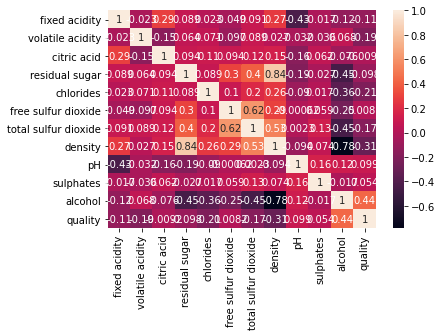

In [3]:
ax = sns.heatmap(df.corr(), annot=True)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.shape

(4898, 12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


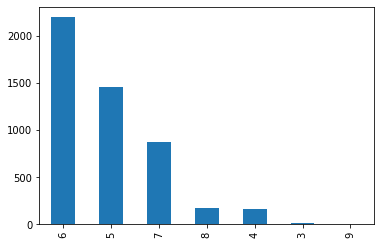

In [6]:
df['quality'].value_counts().plot('bar')

In [7]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [0]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, adjusted_mutual_info_score as ami

# Load Wine Data

In [0]:
random_seed = 1
wine = 'winequality-white.csv'
df = df = pd.read_csv(wine, sep=';')
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
# Standardize
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(data=X_std, columns=X.columns)
# X, X_test, Y, Y_test = train_test_split(data_X, data_y, train_size=0.8, random_state=random_seed)

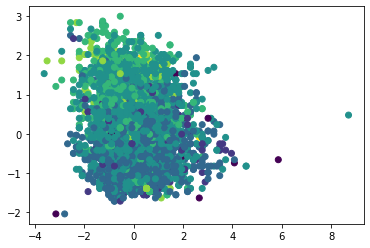

In [10]:
plt.scatter(X_std['fixed acidity'], X_std['alcohol'], c=Y)

# Clustering code - K Means & Expectation Maximization

In [0]:
from sklearn.metrics import v_measure_score
def kmeans(X, Y, random_seed, ds_name):
  wcss = []
  homo = []
  comp = []
  ami_score = []
  sil_score = []
  v_score = []
  fit_time = []
  # we know no labels = 7
  k_vals = range(2, 11)
  for i in k_vals:
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=random_seed)
      start = datetime.datetime.now()
      kmeans.fit(X)
      finish = datetime.datetime.now()
      fit_time.append((finish - start).total_seconds())
      labels_pred = kmeans.labels_
      wcss.append(kmeans.inertia_)
      sil_score.append(silhouette_score(X, labels_pred , metric='euclidean'))
      ami_score.append(ami(Y, labels_pred))
      homo.append(homogeneity_score(Y, labels_pred))
      comp.append(completeness_score(Y, labels_pred))
      v_score.append(v_measure_score(Y, labels_pred))

  # Plot Elbow
  plt.plot(k_vals,wcss, marker='o')
  plt.title('K means - Elbow Method - ' + ds_name)
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.grid()
  plt.show()

  # Scores
  # plt.plot(k_vals, sil_score, label='Silhoutte score')
  plt.plot(k_vals,ami_score, label='Adj Mutual Info', marker='o')
  plt.plot(k_vals,homo, label='Homogeneity', marker='o')
  plt.plot(k_vals,comp, label='Completeness', marker='o')
  plt.plot(k_vals,v_score, label='V-measure', marker='o')
  #TODO: Plot time as well
  plt.title('K means - Evaluation Scores - ' + ds_name)
  plt.xlabel('Number of clusters')
  plt.ylabel('Score')
  plt.legend(loc='best')
  plt.show()

def em(X, Y, random_seed, ds_name):
  bic = []
  homo = []
  comp = []
  ami_score = []
  sil_score = []
  v_score = []
  fit_time = []
  # we know no labels = 7
  k_vals = range(2, 11)
  for i in k_vals:
      gmm = GMM(n_components=i, random_state=random_seed)
      start = datetime.datetime.now()
      gmm.fit(X)
      finish = datetime.datetime.now()
      fit_time.append((finish - start).total_seconds())
      #BIC score (lower better)
      bic.append(gmm.bic(X))
      labels_pred = gmm.predict(X)
      sil_score.append(silhouette_score(X, labels_pred , metric='euclidean'))
      ami_score.append(ami(Y, labels_pred))
      homo.append(homogeneity_score(Y, labels_pred))
      comp.append(completeness_score(Y, labels_pred))
      v_score.append(v_measure_score(Y, labels_pred))

  # Plot Elbow
  plt.plot(k_vals,bic, marker='o')
  plt.title('EM - BIC to choose optimal components - ' + ds_name)
  plt.xlabel('Number of components')
  plt.ylabel('BIC')
  plt.grid()
  plt.show()

  # Scores
  # plt.plot(k_vals, sil_score, label='Silhoutte score')
  plt.plot(k_vals,ami_score, label='Adj Mutual Info', marker='o')
  plt.plot(k_vals,homo, label='Homogeneity', marker='o')
  plt.plot(k_vals,comp, label='Completeness', marker='o')
  plt.plot(k_vals,v_score, label='V-measure', marker='o')
  #TODO: Plot time as well
  plt.title('EM - Evaluation Scores - ' + ds_name)
  plt.xlabel('Number of components')
  plt.ylabel('Score')
  plt.legend(loc='best')
  plt.show()


# ***Wine Dataset***

# K means - Wine Dataset

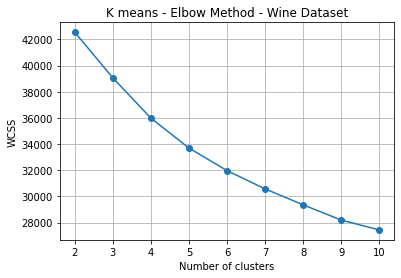

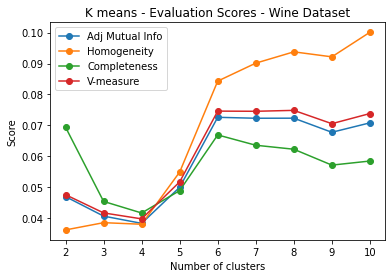

In [12]:
kmeans(X=X_std, Y=Y, random_seed = random_seed, ds_name = 'Wine Dataset')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'K means clusters - Wine Dataset')

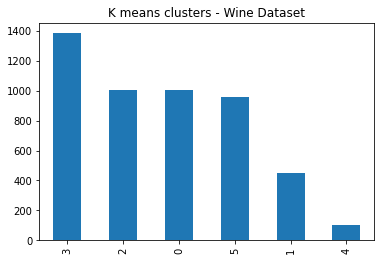

In [13]:
#Choosing k = 6 appx
kmeans1 = KMeans(n_clusters=6, init='k-means++', random_state=random_seed)
kmeans1.fit(X_std)
labels_pred = pd.DataFrame(data = kmeans1.labels_, columns=['Cluster labels'])
labels_pred['Cluster labels'].value_counts().plot('bar')
plt.title('K means clusters - Wine Dataset')

# Expectation Maximization

# EM - Wine Dataset

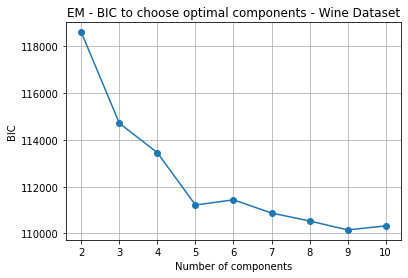

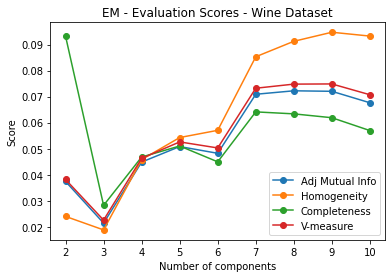

In [14]:
em(X=X_std, Y=Y, random_seed = random_seed, ds_name = 'Wine Dataset')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'EM clusters - Wine Dataset')

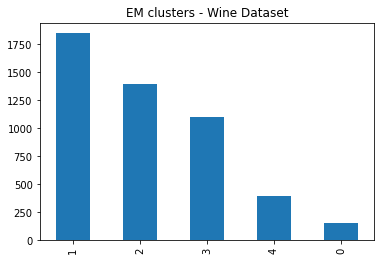

In [15]:
#Choosing components = 5 where BIC lowers significantly
gmm1 = GMM(n_components=5, random_state=random_seed)
gmm1.fit(X_std)
labels_pred = pd.DataFrame(data = gmm1.predict(X_std), columns=['Cluster labels'])
labels_pred['Cluster labels'].value_counts().plot('bar')
plt.title('EM clusters - Wine Dataset')

# ***Seeds Dataset***

# Load Seeds data

In [0]:
random_seed = 1
seeds = 'Seed_Data.csv'
df2 = pd.read_csv(seeds)
X2 = df2.iloc[:, :-1]
Y2 = df2.iloc[:, -1]
# Standardize
X_std2 = StandardScaler().fit_transform(X2)
X_std2 = pd.DataFrame(data=X_std2, columns=X2.columns)
# X, X_test, Y, Y_test = train_test_split(data_X, data_y, train_size=0.8, random_state=random_seed)

# K means - Seeds Dataset

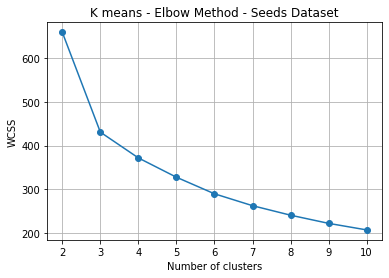

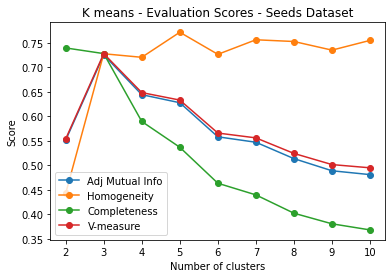

In [17]:
kmeans(X=X_std2, Y=Y2, random_seed = random_seed, ds_name = 'Seeds Dataset')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'K means clusters - Seeds Dataset')

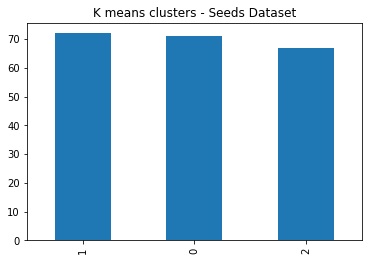

In [18]:
#Choosing k = 3 appx from elbow and score
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=random_seed)
kmeans2.fit(X_std2)
labels_pred = pd.DataFrame(data = kmeans2.labels_, columns=['Cluster labels'])
labels_pred['Cluster labels'].value_counts().plot('bar')
plt.title('K means clusters - Seeds Dataset')

# EM - Seeds Dataset

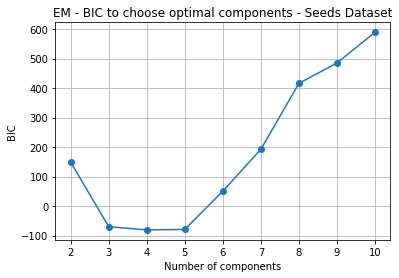

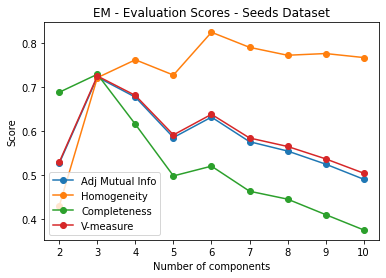

In [19]:
em(X=X_std2, Y=Y2, random_seed = random_seed, ds_name = 'Seeds Dataset')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'EM clusters - Seeds Dataset')

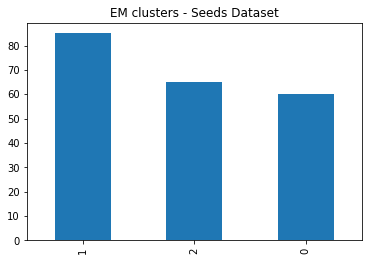

In [20]:
#Choosing components = 3 where BIC lowers significantly
gmm2 = GMM(n_components=3, random_state=random_seed)
gmm2.fit(X_std2)
labels_pred = pd.DataFrame(data = gmm2.predict(X_std2), columns=['Cluster labels'])
labels_pred['Cluster labels'].value_counts().plot('bar')
plt.title('EM clusters - Seeds Dataset')